# Working with geomedians

The goal of this section is to explain and demonstrate how to use geomedians, which are a kind of compositing method. First, we need to load some Sentinel-2 data.

In [1]:
import matplotlib.pyplot as plt

import sys
sys.path.append('../../Scripts')

import datacube

dc = datacube.Datacube(app="Intro_geomedians")

from deafrica_datahandling import load_ard
from deafrica_plotting import rgb

In [2]:
sentinel_2_ds = load_ard(
    dc=dc,
    products=["s2_l2a"],
    x=(39.25, 39.29), 
    y=(-6.77, -6.73),
    time=("2018-01-01", "2018-12-31"),
    output_crs="EPSG:6933",
    resolution=(-10,10),
    group_by='solar_day',
    measurements=['red', 'green', 'blue'])

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Applying pixel quality/cloud mask
Loading 70 time steps


## Compositing and why we need it

Compositing is the process of creating 1 image for an area from several images for that area over time. Compositing creates 1 value for each band for each pixel based on the time series data for that pixel.

As we have seen in the previous [cloud masking section](01_cloud_masking.ipynb) and in the [load data exercise](../session_2/04_Load_data_exercise.ipynb) in session 2, clouds often cover terrain, so to create cloud-free images of areas, we composite our data.

The 2 most imporant kinds of composites for us are median and geomedian composites. 

## Median composites

Median composites set the value for each band for each pixel in the output image to the median value for that band for that pixel. It is very fast, so it can be used to quickly create cloud-free images for areas.

Below, the necessary code for creating a median composite is shown. Calling `median('time')` on an xarray object is all that is needed to create a median composite.

In [3]:
median_composite = sentinel_2_ds.median('time')
median_composite

<xarray.Dataset>
Dimensions:      (x: 387, y: 508)
Coordinates:
  * x            (x) float64 3.787e+06 3.787e+06 ... 3.791e+06 3.791e+06
  * y            (y) float64 -8.566e+05 -8.567e+05 ... -8.617e+05 -8.617e+05
    spatial_ref  int32 6933
Data variables:
    red          (y, x) float32 648.0 644.5 598.0 604.0 ... 633.0 631.0 680.0
    green        (y, x) float32 1025.0 1028.5 1005.0 984.0 ... 938.0 984.0 960.0
    blue         (y, x) float32 982.0 989.5 1001.0 1020.0 ... 968.0 976.0 944.0

As should be expected, the `'time'` dimension has been removed.

## Geomedian composites

Geomedian - or "geometric median" - composites are multi-band generalizations of median composites. Instead of finding a median value for each band for each pixel **individually**, like a median composite does, a geomedian composite finds the median values of the bands for each pixel when considered **together**. 

They take more time to obtain than median composites, but they represent the data better than median composites. If you are using a composite for anything other than a quick visualization, you should only use this compositing method.

Below, the necessary code for creating a geomedian composite is shown. We use the `xr_geomedian()` function from `odc.algo` to create geomedian composites.

In [4]:
from odc.algo import xr_geomedian

geomedian_composite = xr_geomedian(sentinel_2_ds)
geomedian_composite

<xarray.Dataset>
Dimensions:  (x: 387, y: 508)
Coordinates:
  * y        (y) float64 -8.566e+05 -8.567e+05 ... -8.617e+05 -8.617e+05
  * x        (x) float64 3.787e+06 3.787e+06 3.787e+06 ... 3.791e+06 3.791e+06
Data variables:
    red      (y, x) float32 626.52185 649.2127 629.95703 ... 624.1596 640.6322
    green    (y, x) float32 1013.2532 1024.2268 1012.6507 ... 940.6971 923.70764
    blue     (y, x) float32 997.3742 1012.2971 1005.96796 ... 974.4015 953.67053

## Median and geomedian RGB comparison

Below, the median (left) and geomedian (right) composites are shown as RGB images side-by-side.

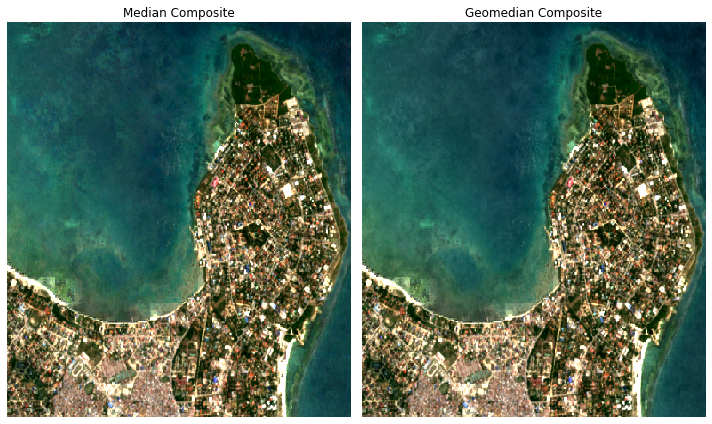

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

rgb(median_composite, bands=['red', 'green', 'blue'], ax=ax[0])
ax[0].set_title("Median Composite")
ax[0].axis('off')

rgb(geomedian_composite, bands=['red', 'green', 'blue'], ax=ax[1])
ax[1].set_title("Geomedian Composite")
ax[1].axis('off')

plt.tight_layout()
plt.show()

As we can see here, there is not much difference between the appearance of the median and geomedian composites.

## Conclusion

You now know what geomedian composites are, why we use them, and how to use them. 

To learn more about composites in general, including more kinds of composites, see [this notebook](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks/blob/master/Frequently_used_code/Generating_composites.ipynb).

To learn more about geomedian composites specifically, see [this notebook](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks/blob/master/Frequently_used_code/Generating_geomedian_composites.ipynb).

In the next section, we will use geomedians in an exercise.